In [1]:
from models.basic_CNN import basic_CNN
from utils import *
from tqdm import tqdm
from training import training
import matplotlib.pyplot as plt

In [2]:
train_data, test_data = get_data()
train_unlabeled_loader, train_labeled_loader, test_loader = get_loader(train_data, test_data, batch_size=50)

In [3]:
train_class = training(train_loader=train_labeled_loader, val_loader=test_loader)
model = basic_CNN()

 <function is_available at 0x0000017785753D30> and can be used by 1 devices
The device used is NVIDIA GeForce GTX 1050


In [4]:
import torch.optim as optim
import torch.nn as nn


output_fn = torch.nn.Softmax(dim=1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [5]:
epochs = 35
train_class.train(model=model, epochs=epochs, optimizer=optimizer, criterion=criterion, output_fn=output_fn)

  3%|▎         | 1/35 [00:18<10:33, 18.65s/it]

| Epoch: 1/35 | Train: Loss 6.4451 Accuracy : 0.1900 | Val: Loss 6.5341 Accuracy : 0.1623



  6%|▌         | 2/35 [00:24<06:07, 11.14s/it]

| Epoch: 2/35 | Train: Loss 2.0129 Accuracy : 0.6200 | Val: Loss 2.1111 Accuracy : 0.4474



  9%|▊         | 3/35 [00:30<04:34,  8.57s/it]

| Epoch: 3/35 | Train: Loss 0.8188 Accuracy : 0.8000 | Val: Loss 1.2367 Accuracy : 0.6572



 11%|█▏        | 4/35 [00:35<03:47,  7.35s/it]

| Epoch: 4/35 | Train: Loss 1.1263 Accuracy : 0.6400 | Val: Loss 2.2323 Accuracy : 0.4750



 14%|█▍        | 5/35 [00:40<03:19,  6.65s/it]

| Epoch: 5/35 | Train: Loss 0.5299 Accuracy : 0.8200 | Val: Loss 1.7437 Accuracy : 0.6346



 17%|█▋        | 6/35 [00:46<02:59,  6.19s/it]

| Epoch: 6/35 | Train: Loss 0.1658 Accuracy : 0.9500 | Val: Loss 1.5542 Accuracy : 0.6615



 20%|██        | 7/35 [00:51<02:45,  5.93s/it]

| Epoch: 7/35 | Train: Loss 0.1280 Accuracy : 0.9600 | Val: Loss 1.5146 Accuracy : 0.6835



 23%|██▎       | 8/35 [00:57<02:36,  5.80s/it]

| Epoch: 8/35 | Train: Loss 0.0796 Accuracy : 0.9700 | Val: Loss 1.6389 Accuracy : 0.6573



 26%|██▌       | 9/35 [01:02<02:30,  5.81s/it]

| Epoch: 9/35 | Train: Loss 0.0471 Accuracy : 0.9800 | Val: Loss 1.6073 Accuracy : 0.6674



 29%|██▊       | 10/35 [01:08<02:19,  5.58s/it]

| Epoch: 10/35 | Train: Loss 0.0178 Accuracy : 1.0000 | Val: Loss 1.4811 Accuracy : 0.6977



 31%|███▏      | 11/35 [01:13<02:10,  5.42s/it]

| Epoch: 11/35 | Train: Loss 0.0082 Accuracy : 1.0000 | Val: Loss 1.4166 Accuracy : 0.7106



 34%|███▍      | 12/35 [01:18<02:01,  5.29s/it]

| Epoch: 12/35 | Train: Loss 0.0054 Accuracy : 1.0000 | Val: Loss 1.4024 Accuracy : 0.7172



 37%|███▋      | 13/35 [01:23<01:54,  5.21s/it]

| Epoch: 13/35 | Train: Loss 0.0046 Accuracy : 1.0000 | Val: Loss 1.4168 Accuracy : 0.7175



 40%|████      | 14/35 [01:28<01:49,  5.24s/it]

| Epoch: 14/35 | Train: Loss 0.0044 Accuracy : 1.0000 | Val: Loss 1.4293 Accuracy : 0.7163



 43%|████▎     | 15/35 [01:33<01:44,  5.22s/it]

| Epoch: 15/35 | Train: Loss 0.0042 Accuracy : 1.0000 | Val: Loss 1.4423 Accuracy : 0.7160



 46%|████▌     | 16/35 [01:39<01:42,  5.38s/it]

| Epoch: 16/35 | Train: Loss 0.0040 Accuracy : 1.0000 | Val: Loss 1.4546 Accuracy : 0.7172



 49%|████▊     | 17/35 [01:45<01:40,  5.61s/it]

| Epoch: 17/35 | Train: Loss 0.0036 Accuracy : 1.0000 | Val: Loss 1.4658 Accuracy : 0.7170



 51%|█████▏    | 18/35 [01:50<01:31,  5.38s/it]

| Epoch: 18/35 | Train: Loss 0.0032 Accuracy : 1.0000 | Val: Loss 1.4759 Accuracy : 0.7180



 54%|█████▍    | 19/35 [01:55<01:23,  5.22s/it]

| Epoch: 19/35 | Train: Loss 0.0029 Accuracy : 1.0000 | Val: Loss 1.4804 Accuracy : 0.7183



 57%|█████▋    | 20/35 [01:59<01:16,  5.10s/it]

| Epoch: 20/35 | Train: Loss 0.0027 Accuracy : 1.0000 | Val: Loss 1.4844 Accuracy : 0.7194



 60%|██████    | 21/35 [02:05<01:12,  5.16s/it]

| Epoch: 21/35 | Train: Loss 0.0025 Accuracy : 1.0000 | Val: Loss 1.4880 Accuracy : 0.7201



 63%|██████▎   | 22/35 [02:10<01:08,  5.24s/it]

| Epoch: 22/35 | Train: Loss 0.0023 Accuracy : 1.0000 | Val: Loss 1.4915 Accuracy : 0.7203



 66%|██████▌   | 23/35 [02:15<01:01,  5.16s/it]

| Epoch: 23/35 | Train: Loss 0.0021 Accuracy : 1.0000 | Val: Loss 1.4947 Accuracy : 0.7208



 69%|██████▊   | 24/35 [02:20<00:56,  5.13s/it]

| Epoch: 24/35 | Train: Loss 0.0020 Accuracy : 1.0000 | Val: Loss 1.4962 Accuracy : 0.7214



 71%|███████▏  | 25/35 [02:25<00:51,  5.15s/it]

| Epoch: 25/35 | Train: Loss 0.0019 Accuracy : 1.0000 | Val: Loss 1.4977 Accuracy : 0.7216



 74%|███████▍  | 26/35 [02:32<00:50,  5.61s/it]

| Epoch: 26/35 | Train: Loss 0.0018 Accuracy : 1.0000 | Val: Loss 1.4992 Accuracy : 0.7217



 77%|███████▋  | 27/35 [02:39<00:48,  6.07s/it]

| Epoch: 27/35 | Train: Loss 0.0018 Accuracy : 1.0000 | Val: Loss 1.5006 Accuracy : 0.7223



 80%|████████  | 28/35 [02:45<00:40,  5.84s/it]

| Epoch: 28/35 | Train: Loss 0.0017 Accuracy : 1.0000 | Val: Loss 1.5020 Accuracy : 0.7223



 83%|████████▎ | 29/35 [02:50<00:34,  5.83s/it]

| Epoch: 29/35 | Train: Loss 0.0017 Accuracy : 1.0000 | Val: Loss 1.5027 Accuracy : 0.7224



 86%|████████▌ | 30/35 [02:57<00:29,  5.95s/it]

| Epoch: 30/35 | Train: Loss 0.0016 Accuracy : 1.0000 | Val: Loss 1.5034 Accuracy : 0.7225



 89%|████████▊ | 31/35 [03:03<00:24,  6.03s/it]

| Epoch: 31/35 | Train: Loss 0.0016 Accuracy : 1.0000 | Val: Loss 1.5040 Accuracy : 0.7230



 91%|█████████▏| 32/35 [03:09<00:17,  5.99s/it]

| Epoch: 32/35 | Train: Loss 0.0016 Accuracy : 1.0000 | Val: Loss 1.5047 Accuracy : 0.7236



 94%|█████████▍| 33/35 [03:14<00:11,  5.84s/it]

| Epoch: 33/35 | Train: Loss 0.0015 Accuracy : 1.0000 | Val: Loss 1.5054 Accuracy : 0.7235



 97%|█████████▋| 34/35 [03:19<00:05,  5.63s/it]

| Epoch: 34/35 | Train: Loss 0.0015 Accuracy : 1.0000 | Val: Loss 1.5057 Accuracy : 0.7234



100%|██████████| 35/35 [03:26<00:00,  5.91s/it]

| Epoch: 35/35 | Train: Loss 0.0015 Accuracy : 1.0000 | Val: Loss 1.5060 Accuracy : 0.7235



In [6]:
#PATH = './basic_model.pth'
#torch.save(model.state_dict(), PATH)

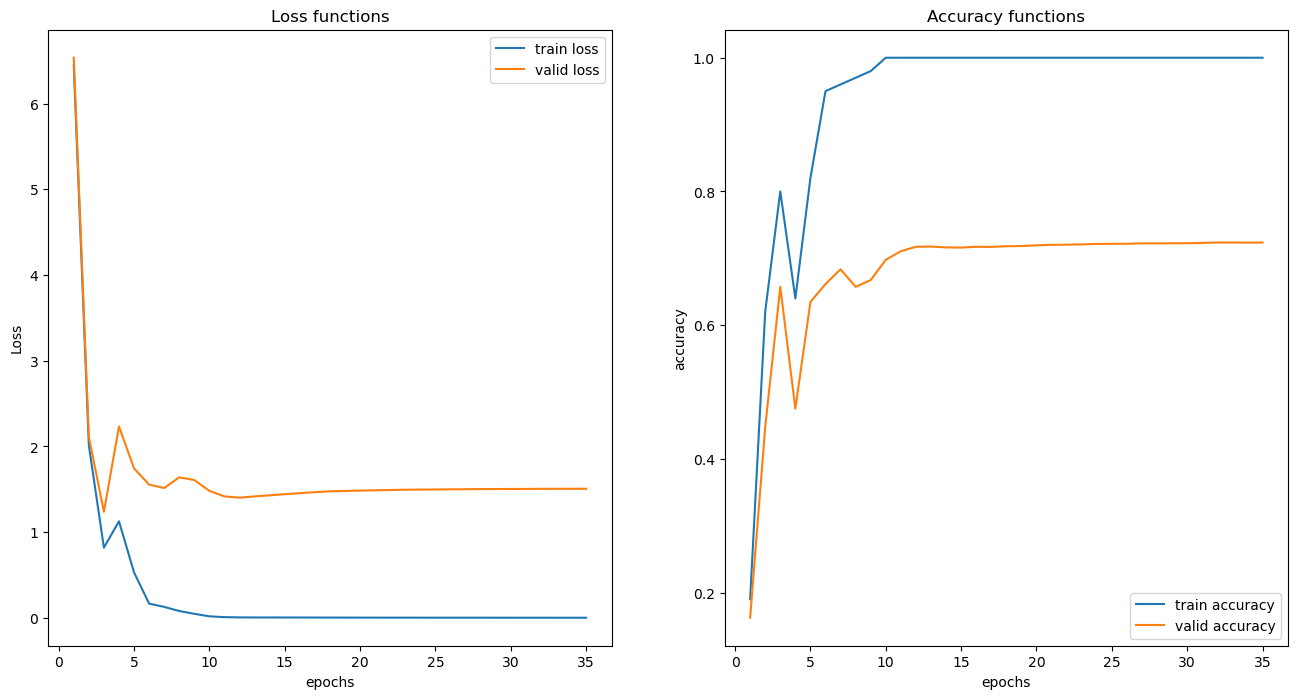

In [8]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(range(1,epochs + 1), train_class.loss_train, label="train loss" )
plt.plot(range(1, epochs +1), train_class.loss_valid, label="valid loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss functions")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,epochs + 1), train_class.acc_train, label="train accuracy" )
plt.plot(range(1, epochs +1), train_class.acc_valid, label="valid accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy functions")
plt.legend()

#plt.savefig("Metrics functins basic model.png")
plt.show()